# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# COVID-19 Cases For San Diego County
`sandiegodata.org-covid19-1.2.1` Last Update: 2020-03-26T03:12:01

_Cases, deaths, hospitalizations and other data scraped from the San Diego COunty COVID-19 website._


This dataset is manually extracted from the daily updates to the [San Diego
County Coronavirus Disease 2019
(COVID-19)](https://www.sandiegocounty.gov/coronavirus/) web page. The table on
the web page is pulled into a [Google
Spreadsheet](https://docs.google.com/spreadsheets/d/1RkgOAgmZIcq7WdNvxn4dih_-aX6
im3fNd9yrfM1-0Ys/edit?usp=sharing), and this dataset extracts the Summary tab
of the Google spreadsheet.

## Caveats

* The County changes the table format ocassionally, often adding columns, to not all variables are available for all dates. 
* This dataset does not include the information for age groups that is available in the source tables. 
* The `cases` value for March 14 is created by interpolating ( exponential ) from the values before and after it.


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [sd_covid_cases](data/sd_covid_cases.csv)**. Notebook for creating dataset.

## References
<ul><li> <strong><a href="https://docs.google.com/spreadsheets/d/1RkgOAgmZIcq7WdNvxn4dih_-aX6im3fNd9yrfM1-0Ys/edit#gid=1588490640">spreadsheet</a></strong>. Google spreadsheet, for humans</li><li> <strong>source</string>, <em>gs:1RkgOAgmZIcq7WdNvxn4dih_-aX6im3fNd9yrfM1-0Ys#1588490640</em>. Machine readable source file</li><ul>

In [3]:
resource_name='sd_covid_cases'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
date,date,
cases,integer,Number of confirmed infections
cases_male,integer,Number of case in males
cases_female,integer,Number of cases in females
hospitalized,integer,Number of hospitalizations
intensive_care,integer,Number in intensive_care
deaths,integer,Number of deaths
rate,number,"Instantaneous growth rate, from the previous day"
notes,string,Notes on each days values.


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,date,cases,cases_male,cases_female,hospitalized,intensive_care,deaths,rate,notes
0,2020-03-12,8,NaN,NaN,NaN,NaN,NaN,NaN,Cases include confirmed and presumptive
1,2020-03-13,10,NaN,NaN,NaN,NaN,NaN,0.2500,Cases include confirmed and presumptive
2,2020-03-14,20,NaN,NaN,NaN,NaN,NaN,1.0000,"Record was missing, so cases value in terpolat..."
3,2020-03-15,39,19.0,20.0,12.0,NaN,0.0,0.9500,NaN
4,2020-03-16,55,35.0,20.0,10.0,NaN,0.0,0.4103,NaN


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,1
number,7
other,1


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
date    14 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 192.0 bytes


None

,count,unique,top,freq,first,last
date,14,14,2020-03-13 00:00:00,1,2020-03-12 00:00:00,2020-03-25 00:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
cases             14 non-null int64
cases_male        11 non-null float64
cases_female      11 non-null float64
hospitalized      11 non-null float64
intensive_care    5 non-null float64
deaths            11 non-null float64
rate              13 non-null float64
dtypes: float64(6), int64(1)
memory usage: 864.0 bytes


None

,count,mean,std,min,25%,50%,75%,max
cases,14.0,117.214286,95.243153,8.0000,43.0000,92.50,193.5000,297.0
cases_male,11.0,92.909091,55.750255,19.0000,46.0000,85.00,139.0000,185.0
cases_female,11.0,43.181818,26.761234,12.0000,20.5000,36.00,62.5000,85.0
hospitalized,11.0,27.181818,17.168682,10.0000,11.5000,27.00,39.0000,59.0
intensive_care,5.0,19.200000,6.260990,13.0000,15.0000,18.00,21.0000,29.0
deaths,11.0,0.545455,0.820200,0.0000,0.0000,0.00,1.0000,2.0
rate,13.0,0.346085,0.296258,0.0522,0.2137,0.25,0.3333,1.0


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


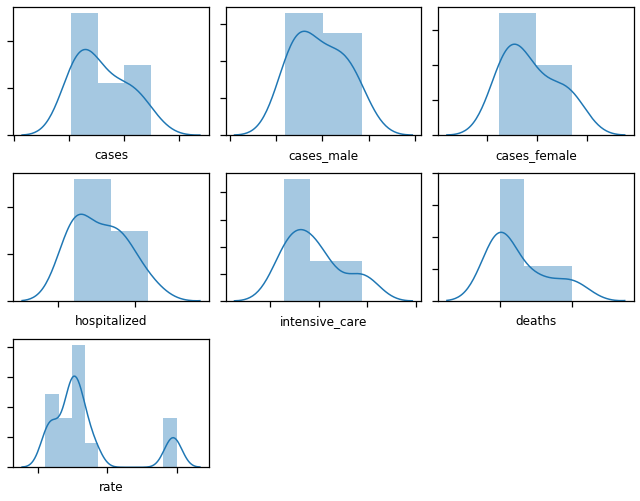

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

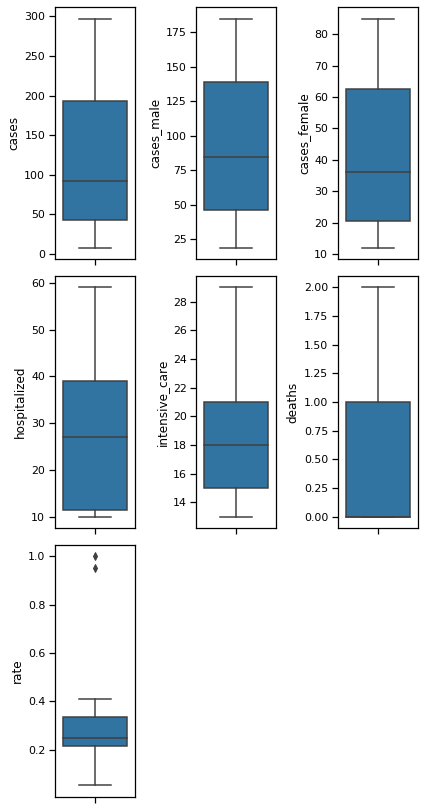

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

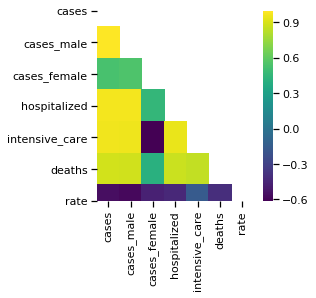

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
notes    3 non-null object
dtypes: object(1)
memory usage: 192.0+ bytes


None

,count,unique,top,freq
notes,3,2,Cases include confirmed and presumptive,2


# Nulls


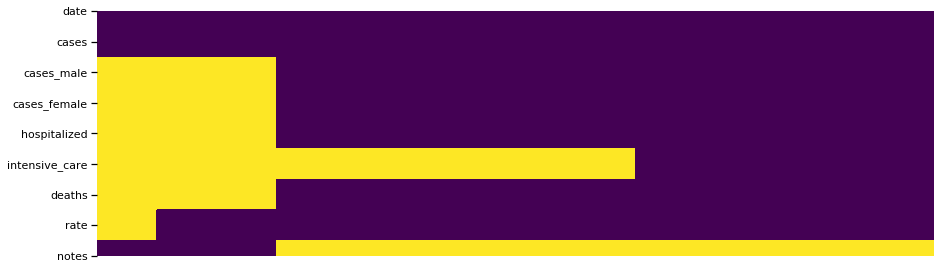

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )